In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

<Figure size 800x600 with 0 Axes>

In [3]:
%load_ext lab_black

In [4]:
cols = [
    "STCNTY",
    "FIPS",
    "E_TOTPOP",
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
    "E_NHPI",
    "E_TWOMORE",
    "E_OTHERRACE",
]

In [5]:
df = helper_400.get_svi_df(cols)

In [6]:
df["E_WHITE"] = df["E_TOTPOP"] - df[
    ["E_AFAM", "E_HISP", "E_ASIAN", "E_AIAN", "E_NHPI", "E_TWOMORE", "E_OTHERRACE"]
].sum(axis=1)

In [7]:
df.head()

,STCNTY,FIPS,E_TOTPOP,E_AFAM,E_HISP,E_ASIAN,E_AIAN,E_NHPI,E_TWOMORE,E_OTHERRACE,E_WHITE
0,6001,6001400100,3035,94,125,424,0,0,170,17,2205
1,6001,6001400200,1983,44,163,219,6,0,211,7,1333
2,6001,6001400300,5058,433,463,773,6,34,209,55,3085
3,6001,6001400400,4179,278,473,418,27,0,282,6,2695
4,6001,6001400500,4021,1101,359,387,0,0,377,0,1797


# Exposure per FIPS over time

In [8]:
exposure = helper_400.get_exposure_df()

In [9]:
len(exposure)

8673

In [10]:
len(exposure[exposure["hws5"] != 0])

148

In [11]:
exposure[exposure["hws"] != 0]["hws"].describe()

count    258.000000
mean       2.686047
std        3.916229
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: hws, dtype: float64

In [12]:
df = df.merge(exposure, left_on="FIPS", right_on="GEOID")

In [13]:
df.head()

,STCNTY,FIPS,E_TOTPOP,E_AFAM,E_HISP,E_ASIAN,E_AIAN,E_NHPI,E_TWOMORE,E_OTHERRACE,...,heatday,smoke_pm_non_zero,smoke_pm_gt_five,hw,hs,hws,ws,hs5,hws5,ws5
0,6001,6001400100,3035,94,125,424,0,0,170,17,...,289,433,134,0,61,0,0,25,0,0
1,6001,6001400200,1983,44,163,219,6,0,211,7,...,300,410,136,0,50,0,0,20,0,0
2,6001,6001400300,5058,433,463,773,6,34,209,55,...,300,410,136,0,50,0,0,20,0,0
3,6001,6001400400,4179,278,473,418,27,0,282,6,...,300,410,136,0,50,0,0,20,0,0
4,6001,6001400500,4021,1101,359,387,0,0,377,0,...,300,410,136,0,50,0,0,20,0,0


In [14]:
hotspots = helper_400.hotspots

In [15]:
demographic_cols = [
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
    "E_NHPI",
    "E_TWOMORE",
    "E_OTHERRACE",
    "E_WHITE",
    "E_TOTPOP",
]

In [16]:
for dc in demographic_cols:
    df[dc + "_normalized"] = df[dc] * 100 / df[dc].sum()

df = df.rename(
    columns={
        "E_WHITE_normalized": "white",
        "E_AFAM_normalized": "black",
        "E_HISP_normalized": "hispanic",
        "E_ASIAN_normalized": "asian",
        "E_AIAN_normalized": "indian or \nalaska native",
    }
)

In [36]:
cats = ["white", "black", "hispanic", "asian", "indian or \nalaska native"]

In [61]:
df["exposure_category"] = helper_400.get_cut_vars("heatday", df["heatday"])

df_melt = pd.melt(
    df[cats + ["exposure_category"]],
    id_vars="exposure_category",
    var_name="type",
    value_name="sum_value",
)

df_melt["std"] = df_melt.groupby(["exposure_category", "type"]).transform("std")

df_agg = (
    df_melt.groupby(["exposure_category", "type"])[["sum_value", "std"]]
    .sum()
    .reset_index()
)

In [62]:
df_agg

,exposure_category,type,sum_value,std
0,0,asian,16.207065,22.223028
1,0,black,20.966894,30.124659
2,0,hispanic,21.501648,17.729993
3,0,indian or \nalaska native,22.768303,63.309478
4,0,white,22.415195,15.802641
5,1,asian,20.986183,28.953947
6,1,black,17.385336,25.192830
7,1,hispanic,21.599737,16.795334
8,1,indian or \nalaska native,22.232522,57.245276
9,1,white,19.800558,15.449981


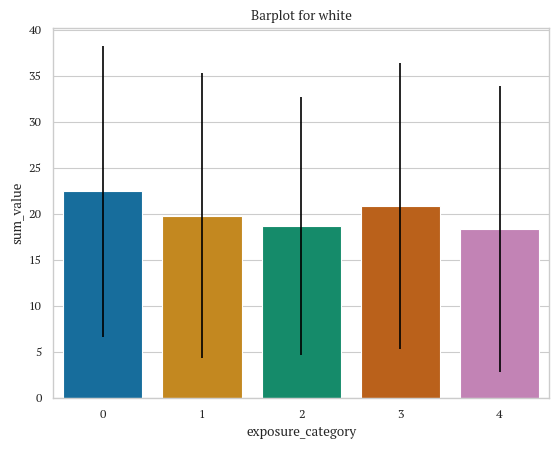

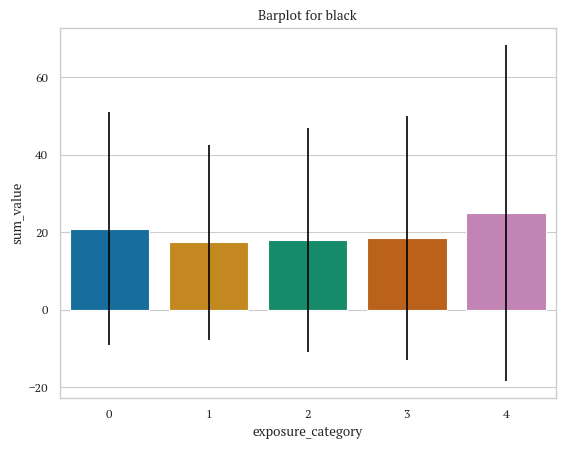

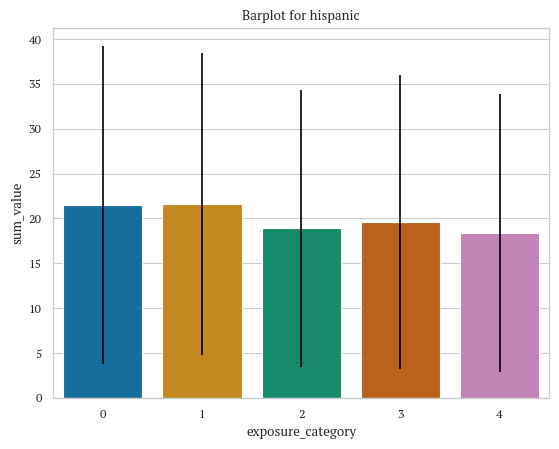

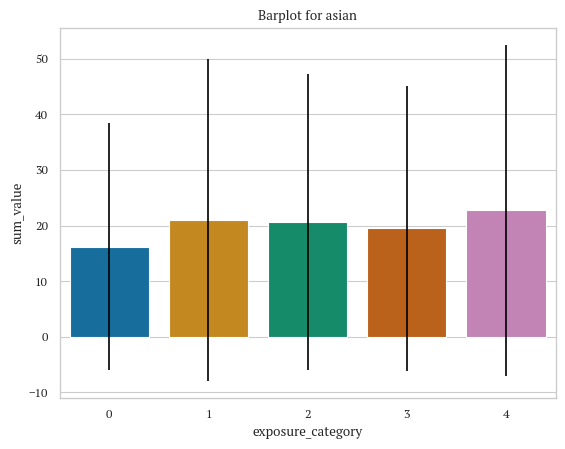

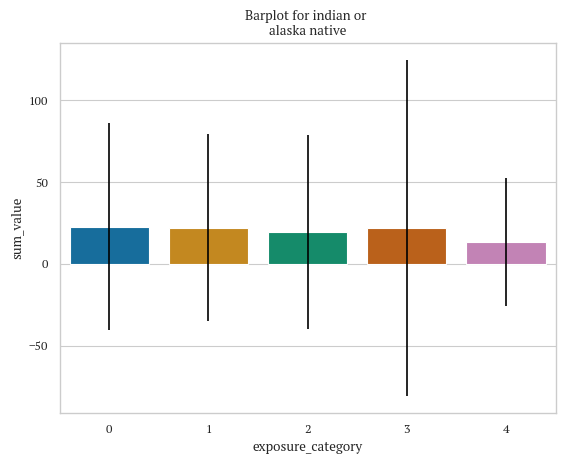

In [64]:
# Create separate bar plots for 'total_bill' and 'tip'
for value_type in cats:
    df_sub = df_agg[df_agg["type"] == value_type]
    plt.figure()
    sns.barplot(x="exposure_category", y="sum_value", data=df_sub, yerr=df_sub["std"])
    plt.title(f"Barplot for {value_type}")
    plt.show()

## Bar plots normalized per population

In [65]:
df_melt = pd.melt(
    df[cats + ["exposure_category"]],
    id_vars="exposure_category",
    var_name="type",
    value_name="sum_value",
)

df_melt

,exposure_category,type,sum_value
0,2,white,0.016041
1,3,white,0.009697
2,3,white,0.022443
3,3,white,0.019605
4,3,white,0.013073
...,...,...,...
43360,1,indian or \nalaska native,0.002357
43361,0,indian or \nalaska native,0.008642
43362,0,indian or \nalaska native,0.000000
43363,0,indian or \nalaska native,0.029067


<Axes: xlabel='exposure_category', ylabel='sum_value'>

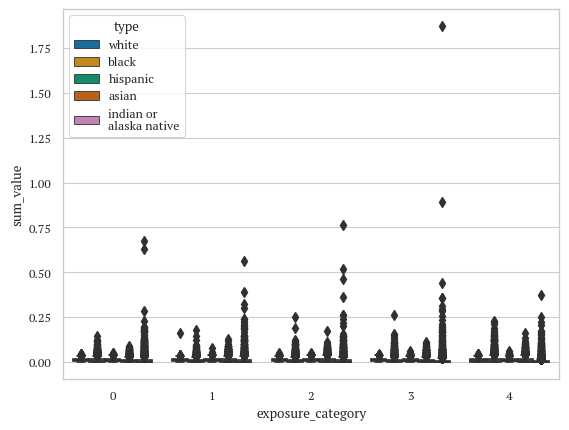

In [68]:
sns.boxplot(
    data=df_melt,
    x="exposure_category",
    y="sum_value",
    hue="type",
)

<Axes: xlabel='exposure_category', ylabel='value'>

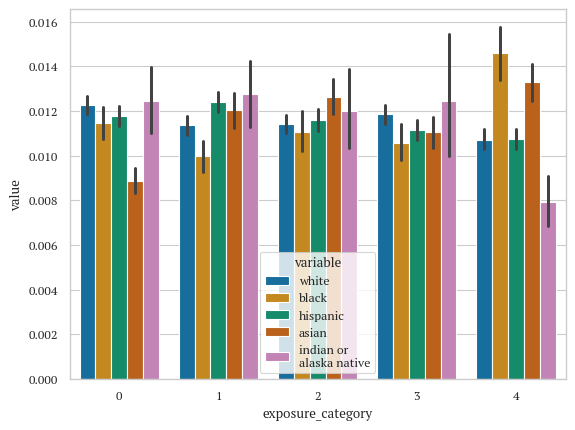

In [71]:
sns.barplot(
    data=plot_df.melt(id_vars=["exposure_category"]),
    x="exposure_category",
    y="value",
    hue="variable",
)

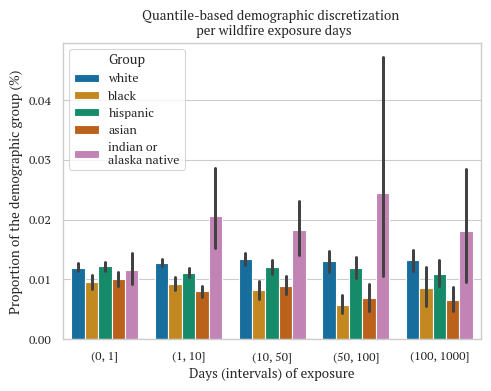

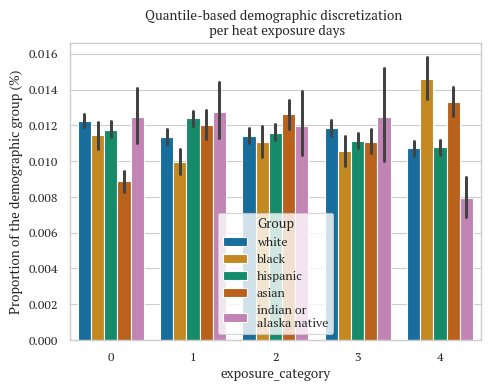

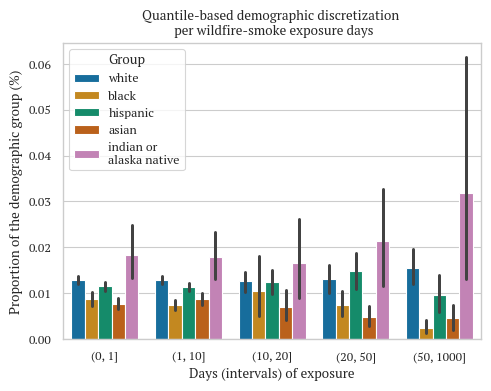

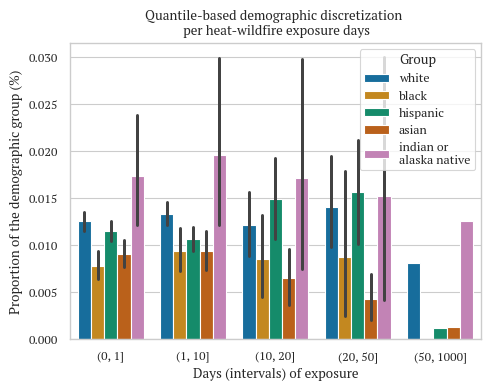

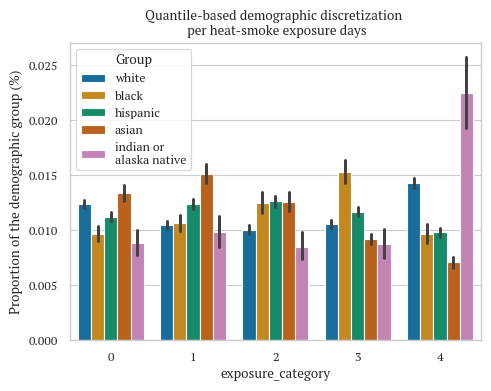

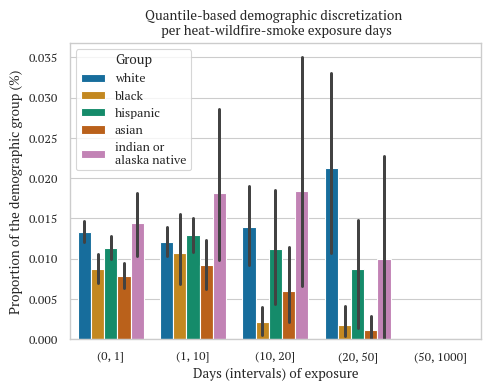

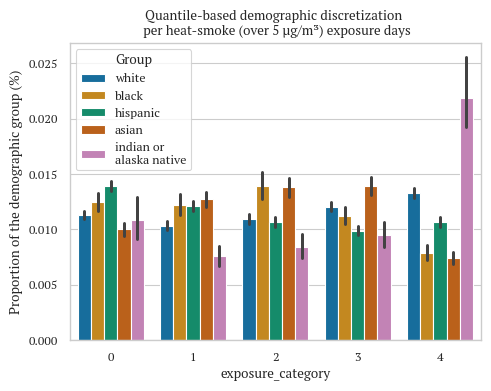

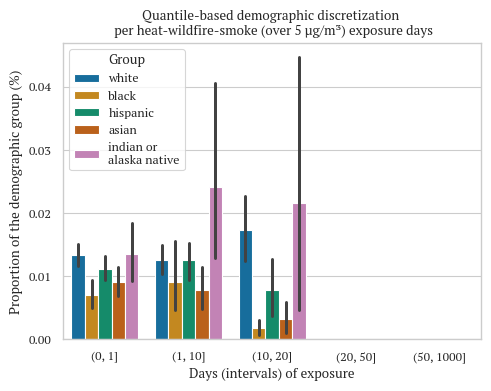

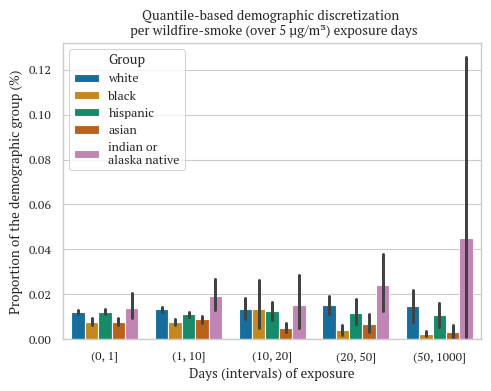

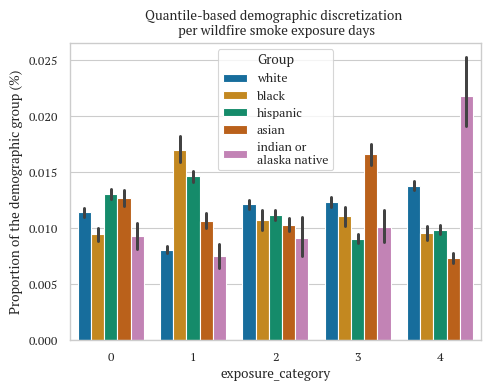

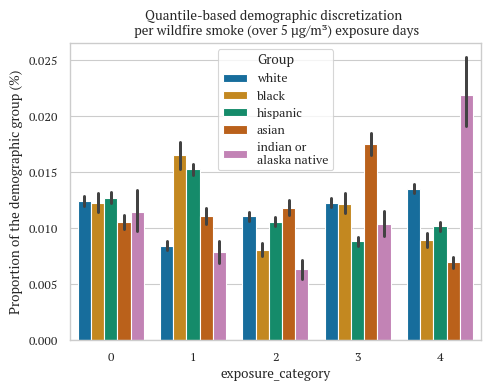

In [73]:
for hspt in hotspots.keys():
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])

    df_melt = pd.melt(
        df[cats + ["exposure_category"]],
        id_vars="exposure_category",
        var_name="type",
        value_name="sum_value",
    )

    df_melt["std"] = df_melt.groupby(["exposure_category", "type"]).transform("std")

    df_agg = (
        df_melt.groupby(["exposure_category", "type"])[["sum_value", "std"]]
        .sum()
        .reset_index()
    )

    plt.figure(figsize=(5, 4))

    sns.barplot(
        data=df_melt,
        x="exposure_category",
        y="sum_value",
        hue="type",
    )

    plt.title(
        "Quantile-based demographic discretization \n per "
        + helper_400.get_var_name(hspt)
        + " exposure days"
    )
    plt.ylabel("Proportion of the demographic group (%)")
    if hspt in ["wfday", "ws", "hw", "hws", "hws5", "ws5"]:
        xlabel = "Days (intervals) of exposure"
        plt.xlabel(xlabel)
    plt.legend(title="Group", loc="best")
    plt.xticks(rotation=0)
    # ax.set_yscale('log')
    plt.tight_layout()
    # if figname:
    #     plt.savefig("figures/qbar_" + figname + "_" + hotspot + ".png")
    plt.show()

## Obsolete

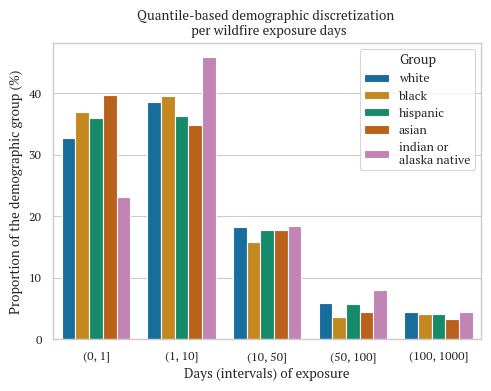

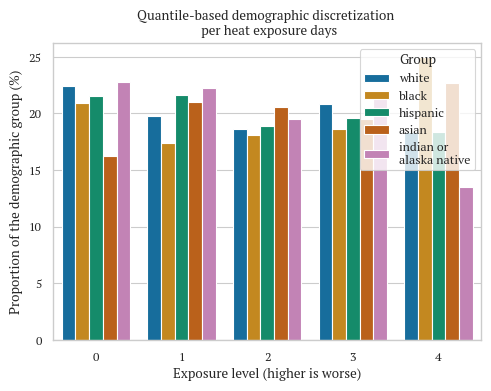

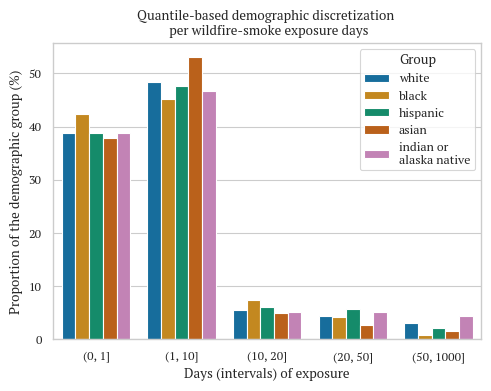

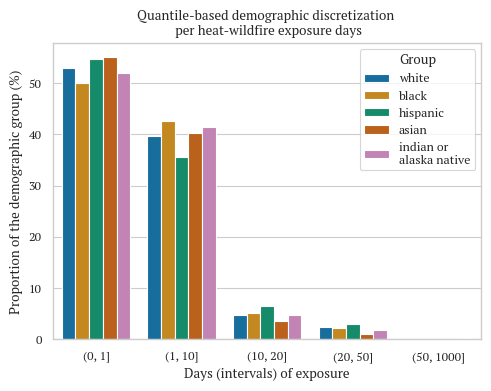

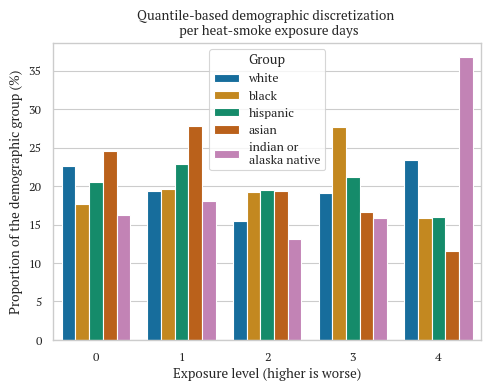

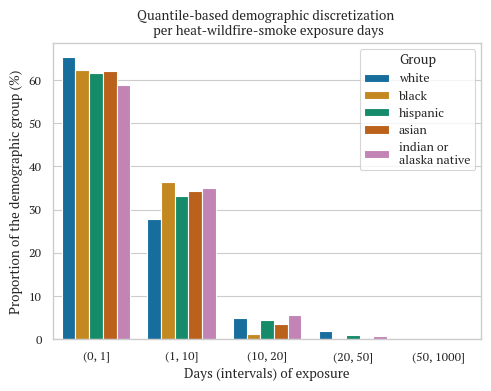

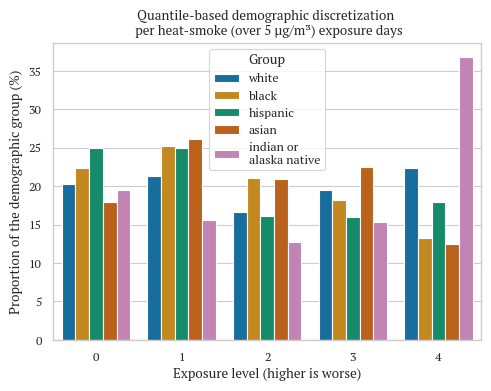

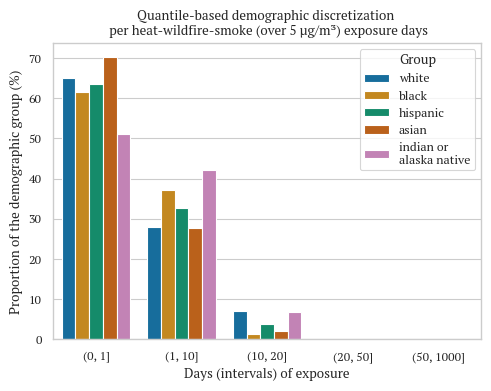

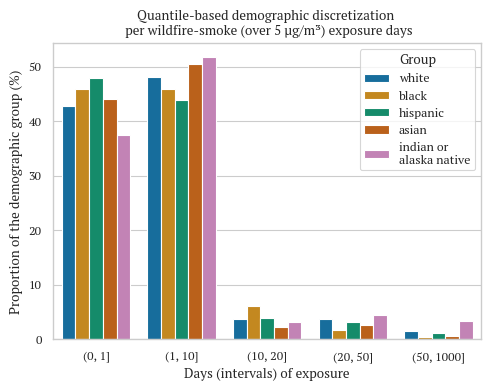

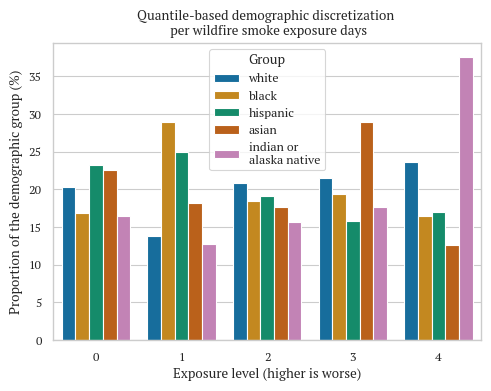

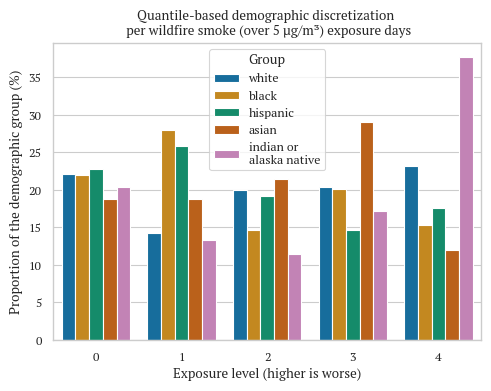

In [26]:
for hspt in hotspots.keys():
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])

    exposure_per_category = df.groupby("exposure_category")[demographic_cols].sum()

    for dc in demographic_cols:
        exposure_per_category[dc + "_normalized"] = (
            exposure_per_category[dc] * 100 / exposure_per_category[dc].sum()
        )

    exposure_per_category = exposure_per_category.drop(columns=demographic_cols)

    exposure_per_category = exposure_per_category.drop(
        columns=[
            "E_TOTPOP_normalized",
            "E_NHPI_normalized",
            "E_TWOMORE_normalized",
            "E_OTHERRACE_normalized",
        ]
    )

    exposure_per_category = exposure_per_category[
        [
            "E_WHITE_normalized",
            "E_AFAM_normalized",
            "E_HISP_normalized",
            "E_ASIAN_normalized",
            "E_AIAN_normalized",
        ]
    ]

    exposure_per_category = exposure_per_category.rename(
        columns={
            "E_WHITE_normalized": "white",
            "E_AFAM_normalized": "black",
            "E_HISP_normalized": "hispanic",
            "E_ASIAN_normalized": "asian",
            "E_AIAN_normalized": "indian or \nalaska native",
        }
    )

    helper_400.plot_qbar(exposure_per_category, hspt, figname="race", legloc="best")